In [37]:
from collections import OrderedDict

def read_classnames(text_file):
    """Return a dictionary containing
    key-value pairs of <folder name>: <class name>.
    """
    classnames = OrderedDict()
    with open(text_file, 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            classname = line.strip()
            classnames[i] = classname
    return classnames

In [39]:
import os
classnames = read_classnames(os.path.join('/hub_data3/byungoh/modelnet40_ply_hdf5_2048/', 'shape_names.txt'))

In [44]:
classnames[32]

'stool'

In [46]:
import h5py
import numpy as np

root = '/hub_data3/byungoh/modelnet40_ply_hdf5_2048/'
def load_data(data_path):
    all_data = []
    all_label = []
    with open(data_path, "r") as f:
        for h5_name in f.readlines():
            f = h5py.File(os.path.join(root, h5_name.strip().split('/')[-1]), 'r')
            data = f['data'][:].astype('float32')
            label = f['label'][:].astype('int64')
            f.close()
            all_data.append(data)
            all_label.append(label)
    all_data = np.concatenate(all_data, axis=0)
    all_label = np.concatenate(all_label, axis=0)
    
    return all_data, all_label

X, Y = load_data(os.path.join('/hub_data3/byungoh/modelnet40_ply_hdf5_2048/', 'train_files.txt'))

In [57]:
def rotation_matrix_x(theta):
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def rotation_matrix_y(theta):
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

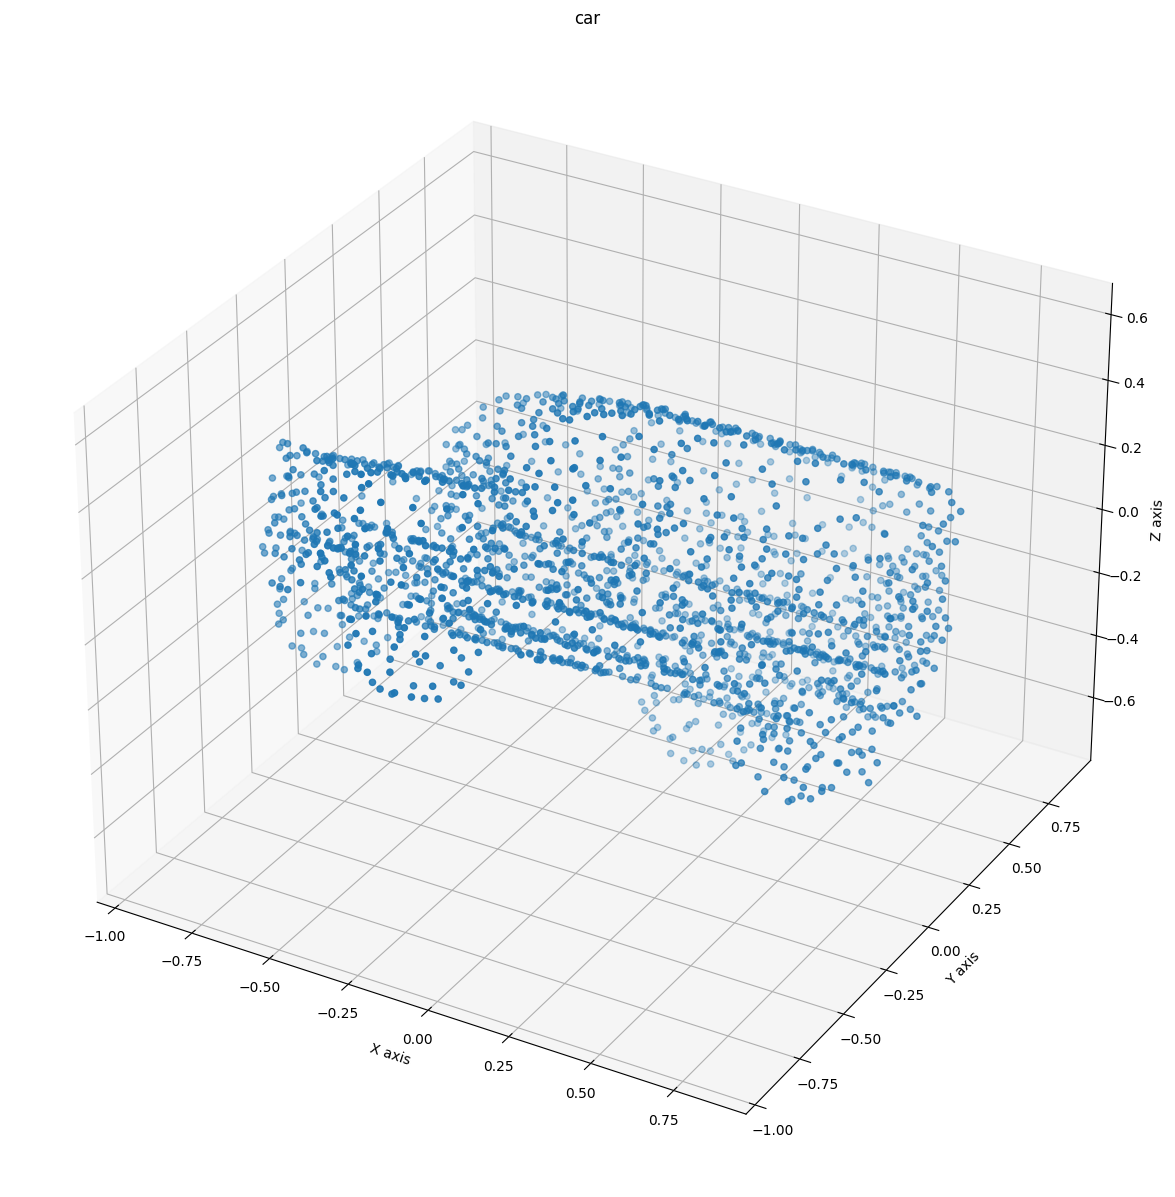

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

i = 5
x_theta = 45
y_theta = 0
z_theta = 0
data = X[i] @ rotation_matrix_x(x_theta).T @ rotation_matrix_y(y_theta).T @ rotation_matrix_z(z_theta).T
label = Y[i]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

ax.scatter(x, y, z)

ax.set_title(classnames[label[0]])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

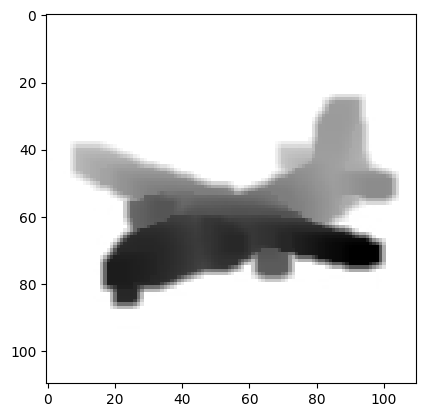

In [27]:
import torch
import matplotlib.pyplot as plt

projected_points = torch.load('TPT/tmp.pt')
plt.imshow(projected_points[2].permute(1,2,0).cpu().numpy())

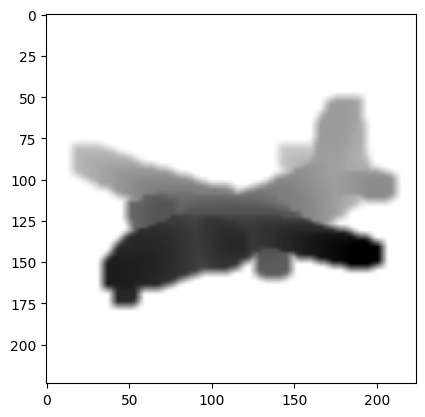

In [30]:
import torch
import matplotlib.pyplot as plt

interpolated_projected_points = torch.load('TPT/tmp.pt')
plt.imshow(interpolated_projected_points[2].permute(1,2,0).cpu().numpy())

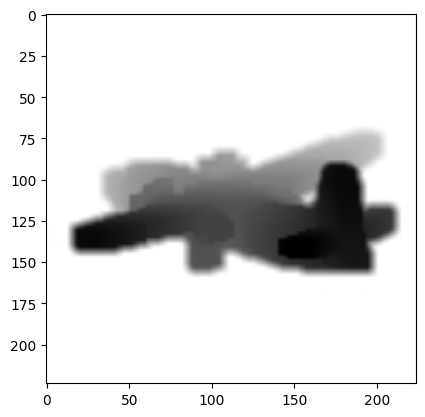

In [36]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor
normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                     std=[0.26862954, 0.26130258, 0.27577711])
unnormalize = UnNormalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                     std=[0.26862954, 0.26130258, 0.27577711])
normalized_interpolated_projected_points = torch.load('TPT/tmp.pt')
plt.imshow(unnormalize(normalized_interpolated_projected_points[3]).permute(1,2,0).cpu().numpy())